In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Data/MA_Accord_sub.csv', low_memory=False)
df.drop(columns = ['Unnamed: 0','body_subtype','engine_measure','engine_aspiration',\
                   'speeds','exterior_color',\
                  'interior_color','first_scraped_at','car_address','currency_indicator',\
                  'miles_indicator','dom_180','dom_active','msrp'],inplace = True)

In [3]:
df.columns

Index(['vin', 'price', 'miles', 'year', 'make', 'model', 'trim',
       'vehicle_type', 'body_type', 'drivetrain', 'fuel_type', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders',
       'base_exterior_color', 'base_interior_color', 'scraped_at',
       'status_date', 'dealer_id', 'street', 'city', 'state', 'zip',
       'latitude', 'longitude', 'seller_type', 'inventory_type', 'car_street',
       'car_city', 'car_state', 'car_zip', 'dom'],
      dtype='object')

In [4]:
index = []
for i in range(len(df)):
    if df['price'].iloc[i] < 50000:
        if df['state'].iloc[i] == 'MA':
            if df['miles'].iloc[i] < 200000:
                index.append(i)
df = df.iloc[index]

In [5]:
df_describe = df.describe()
df_describe.to_csv('describe.csv')

In [6]:
set(df['base_exterior_color'])

{'Beige',
 'Black',
 'Blue',
 'Brown',
 'Gold',
 'Gray',
 'Green',
 'Purple',
 'Red',
 'Silver',
 'White',
 'black',
 'blue',
 'gold',
 'gray',
 'green',
 'maroon',
 nan,
 'red',
 'silver',
 'white'}

In [7]:
df['base_exterior_color'].loc[df[df['base_exterior_color'].isnull()].index] = 'No_color'
df['base_interior_color'].loc[df[df['base_interior_color'].isnull()].index] = 'No_color'

In [8]:
df.dropna(subset=['price','trim','miles','base_interior_color','base_exterior_color'],inplace = True)
print(len(df))

157290


In [9]:
print(len(set(df['vin'])))

8293


In [10]:
df.isnull().sum()

vin                       0
price                     0
miles                     0
year                      0
make                      0
model                     0
trim                      0
vehicle_type              0
body_type                 0
drivetrain                0
fuel_type                 0
engine                    0
engine_size               0
transmission              0
doors                     0
cylinders                 0
base_exterior_color       0
base_interior_color       0
scraped_at                0
status_date               0
dealer_id                23
street                 6472
city                      0
state                     0
zip                     111
latitude                117
longitude               117
seller_type               0
inventory_type            0
car_street             7214
car_city                144
car_state                 0
car_zip                 274
dom                       1
dtype: int64

In [11]:
df['in_out_color'] = df['base_interior_color'] + df['base_exterior_color']

In [12]:
df.head()

,vin,price,miles,year,make,model,trim,vehicle_type,body_type,drivetrain,...,latitude,longitude,seller_type,inventory_type,car_street,car_city,car_state,car_zip,dom,in_out_color
0,1HGCP3F87AA004843,12998.0,70027.0,2010.0,Honda,Accord,EX,Car,Sedan,FWD,...,42.27,-71.62,dealer,used,"310 Turnpike Road, Westborough",Boston,MA,02134,48.0,No_colorNo_color
1,1HGCR2F56GA106766,19000.0,31180.0,2016.0,Honda,Accord,Sport,Car,Sedan,FWD,...,42.26,-71.00,dealer,used,1575 VFW Parkway,West Roxbury,MA,02132,70.0,BlackRed
2,1HGCR2F13HA142610,22888.0,12829.0,2017.0,Honda,Accord,Sport SE,Car,Sedan,FWD,...,42.26,-71.61,dealer,used,"185 Taunton Avenue, Rte 44",Seekonk,MA,02771,262.0,BlackBlack
3,1HGCP2F81BA155009,13798.0,71360.0,2011.0,Honda,Accord,EX-L,Car,Sedan,FWD,...,42.27,-71.62,dealer,used,350 Turnpike Road Route 9,Sharon,MA,02067,24.0,No_colorNo_color
4,1HGCR2F39DA279739,15698.0,34221.0,2013.0,Honda,Accord,LX,Car,Sedan,FWD,...,42.27,-71.62,dealer,used,"75 Otis Street, Westborough",Boston,MA,02134,5.0,No_colorNo_color


In [13]:
set(df['zip'])

{'01001',
 '01001-1316',
 '01013',
 '01020',
 '01028-1824',
 '01030-2123',
 '01060',
 '01069',
 '01089',
 '01095',
 '01105',
 '01109',
 '01201',
 '01301',
 '01331',
 '01373',
 '01420',
 '01460',
 '01462',
 '01463',
 '01501',
 '01505',
 '01515',
 '01523',
 '01537',
 '01545',
 '01568-1340',
 '01580',
 '01581',
 '01601',
 '01607',
 '01610',
 '01701',
 '01702',
 '01719',
 '01752',
 '01752-3243',
 '01754',
 '01756',
 '01757',
 '01760',
 '01772',
 '01772-1708',
 '01775-1445',
 '01776',
 '01778',
 '01801',
 '01803',
 '01821-1801',
 '01830',
 '01840',
 '01843',
 '01851',
 '01867',
 '01876',
 '01901',
 '01902',
 '01905-3017',
 '01915',
 '01923',
 '01940',
 '01952',
 '01960',
 '01970',
 '02021',
 '02021-2835',
 '02025',
 '02026',
 '02032',
 '02035',
 '02043',
 '02043-1503',
 '02048',
 '02061',
 '02062',
 '02062-2625',
 '02067',
 '02072',
 '02072-3344',
 '02090',
 '02108',
 '02128',
 '02132',
 '02134',
 '02135',
 '02143',
 '02143-3401',
 '02145',
 '02148',
 '02149',
 '02150',
 '02151',
 '02155',


In [14]:
df.to_csv('MA_Honda_Accord.csv')

In [15]:
df_vinmiles = df.groupby(['vin','miles','trim','in_out_color']).mean()
df_vinmiles = df_vinmiles.reset_index()

In [16]:
df_vinmiles.head()

,vin,miles,trim,in_out_color,price,year,engine_size,doors,cylinders,scraped_at,status_date,dealer_id,latitude,longitude,dom
0,1HGCD5631VA269997,145921.0,LX,No_colorNo_color,1995.0,1997.0,2.7,4.0,6.0,1.507650e+09,1.508512e+09,1.077172e+06,41.650000,-70.290000,10.0
1,1HGCF86602A001105,78347.0,VP,No_colorNo_color,4550.0,2002.0,2.3,4.0,4.0,1.505867e+09,1.508421e+09,1.002080e+06,42.150000,-71.210000,51.5
2,1HGCG16522A063374,62357.0,EX,No_colorNo_color,5998.0,2002.0,3.0,4.0,6.0,1.501794e+09,1.503492e+09,1.016270e+06,42.331667,-71.101667,20.0
3,1HGCG16532A059933,130267.0,EX,No_colorBlack,3995.0,2002.0,3.0,4.0,6.0,1.519425e+09,1.522278e+09,1.023148e+06,42.200000,-71.000000,34.0
4,1HGCG1654YA099852,86872.0,EX-L,GrayBlack,4498.0,2000.0,3.0,4.0,6.0,1.561597e+09,1.562892e+09,1.027861e+06,42.183600,-71.853800,17.0


In [17]:
len(df_vinmiles)

13549

In [18]:
df_touring = df_vinmiles.loc[df_vinmiles['trim'] == 'Touring']
df_touring.head()

,vin,miles,trim,in_out_color,price,year,engine_size,doors,cylinders,scraped_at,status_date,dealer_id,latitude,longitude,dom
11847,1HGCR3F90DA039912,46468.0,Touring,No_colorNo_color,20999.000000,2013.0,3.5,4.0,6.0,1.484991e+09,1.487109e+09,1.007986e+06,42.100000,-72.58000,71.000000
11848,1HGCR3F90DA039912,46470.0,Touring,No_colorNo_color,17888.000000,2013.0,3.5,4.0,6.0,1.487254e+09,1.488310e+09,1.007986e+06,42.100000,-72.58000,94.000000
11849,1HGCR3F90DA039912,54526.0,Touring,No_colorNo_color,18222.000000,2013.0,3.5,4.0,6.0,1.495576e+09,1.496668e+09,1.007986e+06,42.100000,-72.58000,107.000000
11850,1HGCR3F90FA017394,46460.0,Touring,GrayWhite,18131.086957,2015.0,3.5,4.0,6.0,1.566255e+09,1.567590e+09,1.031976e+06,42.181987,-71.17583,20.782609
11851,1HGCR3F90GA018109,8925.0,Touring,No_colorNo_color,26999.000000,2016.0,3.5,4.0,6.0,1.478204e+09,1.480451e+09,1.007986e+06,42.100000,-72.58000,27.000000


In [19]:
df_hybridtouring = df_vinmiles.loc[df_vinmiles['trim'] == 'Hybrid Touring']
df_hybridtouring.head()

,vin,miles,trim,in_out_color,price,year,engine_size,doors,cylinders,scraped_at,status_date,dealer_id,latitude,longitude,dom
12097,1HGCR6F71EA007195,32350.0,Hybrid Touring,No_colorNo_color,21398.000000,2014.0,2.0,4.0,4.0,1.494839e+09,1.495198e+09,1.021406e+06,42.372500,-71.062500,8.750
12098,1HGCR6F71EA007195,32505.0,Hybrid Touring,No_colorNo_color,20816.571429,2014.0,2.0,4.0,4.0,1.497415e+09,1.498566e+09,1.022040e+06,42.434286,-71.057857,38.000
12099,1HGCR6F71EA007195,32505.0,Hybrid Touring,No_colorgold,21398.000000,2014.0,2.0,4.0,4.0,1.496167e+09,1.496157e+09,1.002121e+06,42.390000,-71.090000,20.000
12100,1HGCR6F71EA007195,33053.0,Hybrid Touring,No_colorNo_color,21898.000000,2014.0,2.0,4.0,4.0,1.500712e+09,1.501533e+09,1.027834e+06,42.366667,-71.053333,72.000
12101,1HGCR6F72EA008470,76020.0,Hybrid Touring,GrayGray,16000.000000,2014.0,2.0,4.0,4.0,1.567411e+09,1.568131e+09,1.025193e+06,42.225450,-71.178450,38.125


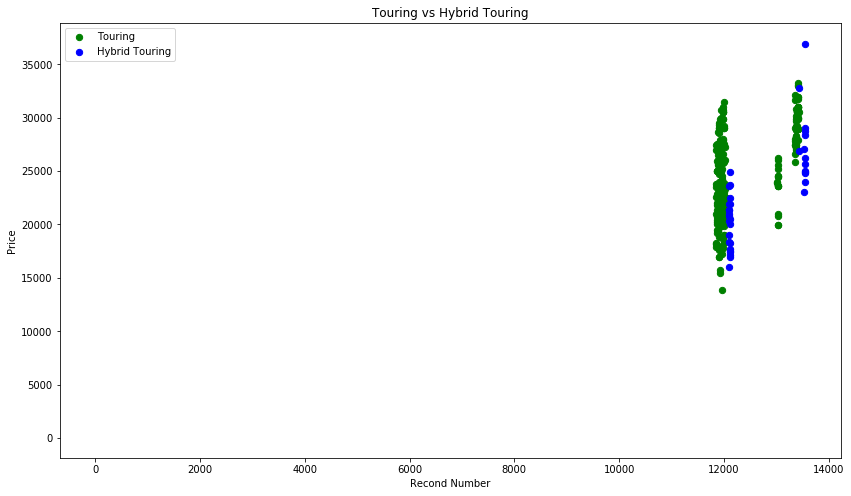

In [20]:
plt.figure(figsize=(14,8))
plt.scatter(df_touring.index, df_touring['price'], c='g', s=40)
plt.scatter(df_hybridtouring.index, df_hybridtouring['price'], c='b', s=40)
plt.xlabel('Recond Number')
plt.ylabel('Price')
plt.title('Touring vs Hybrid Touring')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Scatter')

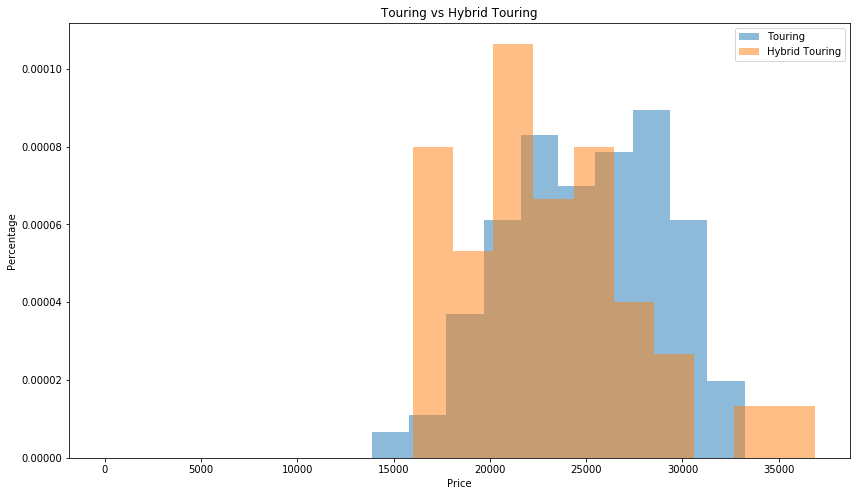

In [21]:
plt.figure(figsize=(14,8))
plt.hist(df_touring['price'], density =True, alpha = 0.5)
plt.hist(df_hybridtouring['price'], density =True, alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Percentage')
plt.title('Touring vs Hybrid Touring')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Histogram')

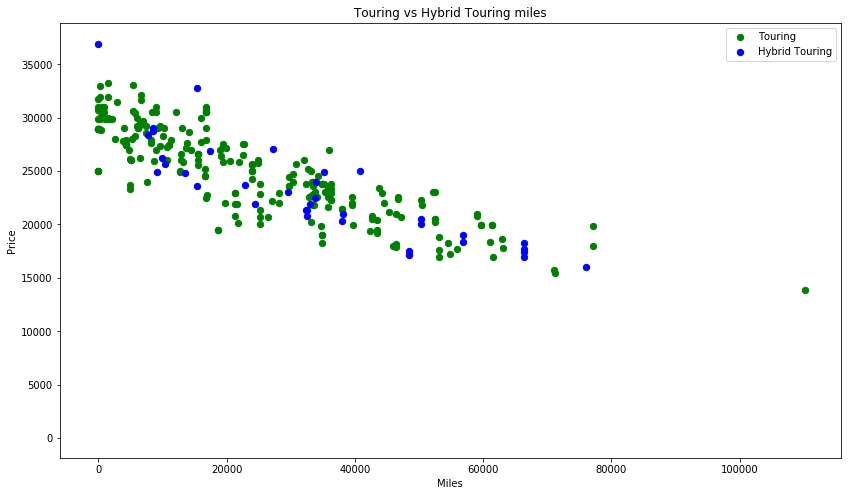

In [22]:
plt.figure(figsize=(14,8))
plt.scatter(df_touring['miles'], df_touring['price'], c='g', s=40)
plt.scatter(df_hybridtouring['miles'], df_hybridtouring['price'], c='b', s=40)
plt.xlabel('Miles')
plt.ylabel('Price')
plt.title('Touring vs Hybrid Touring miles')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Scatter Miles')

In [23]:
set(df_vinmiles['trim'])

{'3.0 EX',
 '3.0 SE',
 'Base',
 'EX',
 'EX LEATHER',
 'EX Leather',
 'EX V6',
 'EX W/LEATHER',
 'EX-L',
 'EX-L V-6',
 'EX-L V6',
 'Hybrid',
 'Hybrid EX',
 'Hybrid EX-L',
 'Hybrid Touring',
 'LX',
 'LX-P',
 'LX-S',
 'LX-SE',
 'Plug-In',
 'SE',
 'Sport',
 'Sport SE',
 'Touring',
 'Touring V6',
 'VP'}

In [24]:
df_vinmileszip = df.groupby(['vin','miles','trim','zip','in_out_color']).mean()
df_vinmileszip = df_vinmileszip.reset_index()
df_vinmileszip

,vin,miles,trim,zip,in_out_color,price,year,engine_size,doors,cylinders,scraped_at,status_date,dealer_id,latitude,longitude,dom
0,1HGCD5631VA269997,145921.0,LX,02601,No_colorNo_color,1995.0,1997.0,2.7,4.0,6.0,1.507650e+09,1.508512e+09,1077172.0,41.6500,-70.2900,10.0
1,1HGCF86602A001105,78347.0,VP,02032,No_colorNo_color,4550.0,2002.0,2.3,4.0,4.0,1.505867e+09,1.508421e+09,1002080.0,42.1500,-71.2100,51.5
2,1HGCG16522A063374,62357.0,EX,01760,No_colorNo_color,5998.0,2002.0,3.0,4.0,6.0,1.501808e+09,1.503519e+09,1009871.0,42.2900,-71.3600,20.0
3,1HGCG16522A063374,62357.0,EX,01940,No_colorNo_color,5998.0,2002.0,3.0,4.0,6.0,1.501734e+09,1.503458e+09,1017921.0,42.5300,-71.0300,20.0
4,1HGCG16522A063374,62357.0,EX,02134,No_colorNo_color,5998.0,2002.0,3.0,4.0,6.0,1.501814e+09,1.503527e+09,1029000.0,42.3600,-71.1300,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63262,JHMCR6F78HC024632,7826.0,Hybrid Touring,02460,BlackBlack,28400.0,2017.0,2.0,4.0,4.0,1.525563e+09,1.527412e+09,1062792.0,42.3500,-71.2000,85.5
63263,JHMCR6F7XHC002504,34000.0,Hybrid Touring,01923,BrownBlack,23998.0,2017.0,2.0,4.0,4.0,1.561154e+09,1.561408e+09,1053106.0,42.5595,-70.9712,249.0
63264,JHMCR6F7XHC002504,34000.0,Hybrid Touring,02062,BrownBlack,23998.0,2017.0,2.0,4.0,4.0,1.560671e+09,1.561361e+09,1053183.0,42.1706,-71.1963,248.5
63265,JHMCR6F7XHC025099,9897.0,Hybrid Touring,01095,GrayGray,26248.0,2017.0,2.0,4.0,4.0,1.562802e+09,1.564145e+09,1006743.0,42.1501,-72.4671,102.0


In [25]:
gas_list = ['3.0 EX','3.0 LX','3.0 SE','Base','DX','EX','EX LEATHER',\
             'EX Leather','EX V6','EX W/LEATHER','EX-L','EX-L V-6',\
             'EX-L V6','LX','LX-P','LX-S','LX-SE','SE','Sport','Sport SE',\
             'Touring','Touring V6','VP']
hybrid_list = ['Hybrid','Hybrid EX','Hybrid EX-L','Hybrid Touring','Plug-In']
gas_index = []
hybrid_index = []
for i in range(len(df_vinmileszip)):
    temp = df_vinmileszip['zip'].iloc[i]
    if len(temp) <5:
        temp = '0' + temp
        df_vinmileszip['zip'].iloc[i] = temp
    if len(temp) >5:
        temp = temp[:5]
        df_vinmileszip['zip'].iloc[i] = temp
for i in range(len(df_vinmileszip)):
    if df_vinmileszip['trim'].iloc[i] in gas_list:
        if int(df_vinmileszip['price'].iloc[i]) < 50000:
            gas_index.append(i)
    else:
        if int(df_vinmileszip['price'].iloc[i]) < 50000:
            hybrid_index.append(i)
df_gas = df_vinmileszip.iloc[gas_index]
df_hybrid = df_vinmileszip.iloc[hybrid_index]

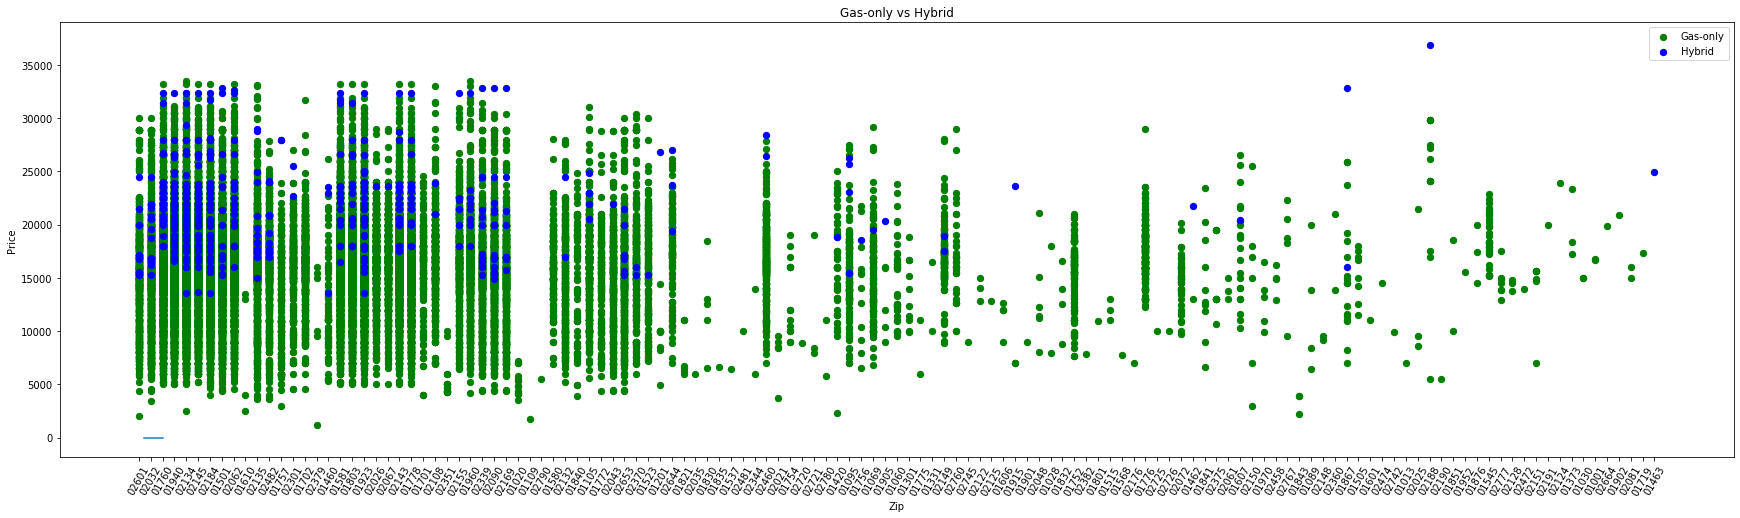

In [26]:
plt.figure(figsize=(30,8))
plt.scatter(df_gas['zip'], df_gas['price'], c='g', s=40)
plt.scatter(df_hybrid['zip'], df_hybrid['price'], c='b', s=40)
plt.xlabel('Zip')
plt.xticks(rotation=60)
plt.ylabel('Price')
plt.title('Gas-only vs Hybrid')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Gas-only vs Hybrid Scatter',dpi=300)

In [27]:
# fig = plt.figure(figsize=(20,20))
# ax = plt.axes(projection="3d")
# z_points = df_gas['miles']
# x_points = df_gas['zip'].astype(int)
# y_points = df_gas['price']
# x = df_hybrid['zip'].astype(int)
# y = df_hybrid['price']
# z = df_hybrid['miles']
# ax.set_xlabel('Zip')
# ax.set_ylabel('Price')
# ax.set_zlabel('Miles')
# ax.scatter3D(x_points, y_points, z_points, c='g', alpha = 0.5);
# ax.scatter3D(x, y, z, c='b',alpha = 0.8);
# plt.savefig('Zip vs Price vs Miles 3D')

In [28]:
#import plotly.graph_objects as go

In [29]:
# fig = go.Figure()

# fig.add_trace(go.Scatter3d(
#     x=df_gas['zip'].astype(int),
#     y=df_gas['price'],
#     z=df_gas['miles'],
#     name='Gas-only',
#     mode='markers',
#     marker=dict(
#         size=2,    
#         color = 'blue',
#         opacity=0.6
#     )
# ))

# fig.add_trace(go.Scatter3d(
#     x=df_hybrid['zip'].astype(int),
#     y=df_hybrid['price'],
#     z=df_hybrid['miles'],
#     name='Hybrid',
#     mode='markers',
#     marker=dict(
#         size=2, 
#         color = 'green',
#         opacity=0.8
#     )
# ))


# # tight layout
# fig.update_layout(title='Zip vs Price vs Miles',\
#                   scene= dict(xaxis_title = 'Zip',\
#                   yaxis_title = 'Price',\
#                   zaxis_title = 'Miles'),\
#                   font=dict(family="Courier New, monospace",size=14,color="#7f7f7f"),
#                   margin=dict(l=0, r=0, b=0, t=0))
# fig.show()

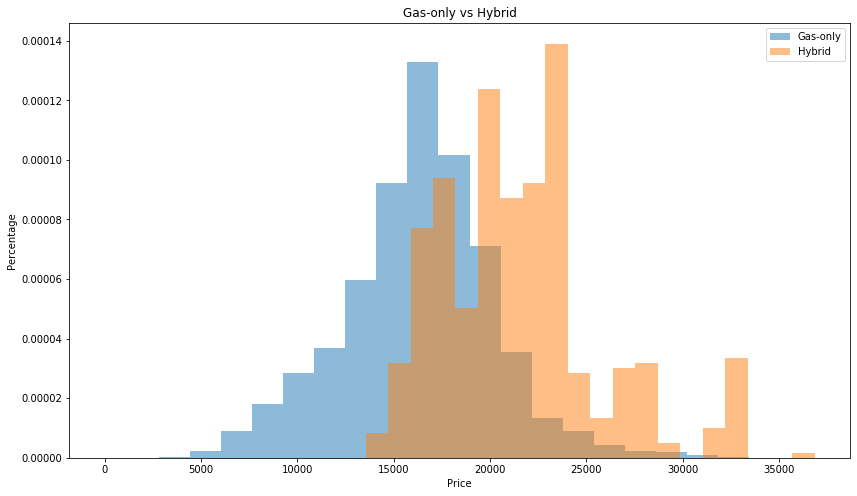

In [30]:
plt.figure(figsize=(14,8))
plt.hist(df_gas['price'], bins = 20, density =True, alpha = 0.5)
plt.hist(df_hybrid['price'],  bins = 20, density = True, alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Percentage')
plt.title('Gas-only vs Hybrid')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Gas-only vs Hybrid Hist')

In [31]:
# plt.figure(figsize=(14,8))
# plt.scatter(df_gas['miles'], df_gas['price'], c='g', s=40)
# plt.scatter(df_hybrid['miles'], df_hybrid['price'], c='b', s=40)
# plt.xlabel('Miles')
# plt.ylabel('Price')
# plt.title('Gas-only vs Hybrid miles')
# plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
# plt.plot([0.4,2],[0,0])
# plt.savefig('Gas-only vs Hybrid Scatter Miles')

In [32]:
# temp = df_vinmiles.loc[df_vinmiles['vin'] == '1HGCR2F13HA142610']
# temp

In [33]:
# def zipgroup(df, lower, upper):
#     index = []
#     for i in range(len(df)):
#         if int(df['zip'].iloc[i]) <= upper:
#             if int(df['zip'].iloc[i]) >= lower:
#                 index.append(i)
#     return df.iloc[index]

In [34]:
# df_1000_1200 = zipgroup(df_gas, 1000, 1200)
# df_1400_1600 = zipgroup(df_gas, 1400, 1600)
# df_1601_1850 = zipgroup(df_gas, 1601, 1850)
# df_1851_2000 = zipgroup(df_gas, 1851, 2000)
# df_2001_2200 = zipgroup(df_gas, 2001, 2200)
# df_2201_2800 = zipgroup(df_gas, 2201, 2800)

In [35]:
# def lr(df):
#     reg = LinearRegression()
#     reg.fit(np.array(df['miles']).reshape(-1,1), df['price'])
#     return reg.predict(np.array(list(range(150000))).reshape(-1, 1))

In [36]:
# y1 = lr(df_1000_1200)
# y2 = lr(df_1400_1600)
# y3 = lr(df_1601_1850)
# y4 = lr(df_1851_2000)
# y5 = lr(df_2001_2200)
# y6 = lr(df_2201_2800)
# X = np.array(list(range(150000))).reshape(-1, 1)
# plt.figure(figsize=(20,15))
# plt.plot(X, y1, linewidth=2)
# plt.plot(X, y2, linewidth=2)
# plt.plot(X, y3, linewidth=2)
# plt.plot(X, y4, linewidth=2)
# plt.plot(X, y5, linewidth=2)
# plt.plot(X, y6, linewidth=2)
# plt.xlabel('Mileage')
# plt.ylabel('Price')
# plt.title('Mileage vs Price with Group Zip')
# plt.legend(labels = ['1000-1200','1400-1600','1601-1850','1851-2000','2001-2200','2201-2800'],\
#            loc='best',fontsize='xx-large')
# plt.show()

In [37]:
# df_hybrid_1000_1200 = zipgroup(df_hybrid, 1000, 1200)
# df_hybrid_1400_1600 = zipgroup(df_hybrid, 1400, 1600)
# df_hybrid_1601_1850 = zipgroup(df_hybrid, 1601, 1850)
# df_hybrid_1851_2000 = zipgroup(df_hybrid, 1851, 2000)
# df_hybrid_2001_2200 = zipgroup(df_hybrid, 2001, 2200)
# df_hybrid_2201_2800 = zipgroup(df_hybrid, 2201, 2800)
# y7 = lr(df_hybrid_1000_1200)
# y8 = lr(df_hybrid_1400_1600)
# y9 = lr(df_hybrid_1601_1850)
# y10 = lr(df_hybrid_1851_2000)
# y11 = lr(df_hybrid_2001_2200)
# y12 = lr(df_hybrid_2201_2800)
# X = np.array(list(range(150000))).reshape(-1, 1)
# plt.figure(figsize=(20,15))
# plt.plot(X, y7, linewidth=2)
# plt.plot(X, y8, linewidth=2)
# plt.plot(X, y9, linewidth=2)
# plt.plot(X, y10, linewidth=2)
# plt.plot(X, y11, linewidth=2)
# plt.plot(X, y12, linewidth=2)
# plt.xlabel('Mileage')
# plt.ylabel('Price')
# plt.title('Mileage vs Price with Group Zip Hybrid')
# plt.legend(labels = ['Hybrid 1000-1200','Hybrid 1400-1600','Hybrid 1601-1850','Hybrid 1851-2000',\
#                      'Hybrid 2001-2200', 'Hybrid 2201-2800'],loc='best',fontsize='xx-large')
# plt.savefig('Mileage vs Price with Group Zip Hybrid')
# plt.show()

In [38]:
# plt.figure(figsize=(20,15))
# plt.plot(X, y1, linewidth=2)
# plt.plot(X, y2, linewidth=2)
# plt.plot(X, y3, linewidth=2)
# plt.plot(X, y4, linewidth=2)
# plt.plot(X, y5, linewidth=2)
# plt.plot(X, y6, linewidth=2)
# plt.plot(X, y7, linewidth=2)
# plt.plot(X, y8, linewidth=2)
# plt.plot(X, y9, linewidth=2)
# plt.plot(X, y10, linewidth=2)
# plt.plot(X, y11, linewidth=2)
# plt.plot(X, y12, linewidth=2)
# plt.xlabel('Mileage')
# plt.ylabel('Price')
# plt.title('Mileage vs Price with Group Zip')
# plt.legend(labels = ['1000-1200','1400-1600','1601-1850','1851-2000','2001-2200','2201-2800',\
#                      'Hybrid 1000-1200','Hybrid 1400-1600','Hybrid 1601-1850',\
#                      'Hybrid 1851-2000','Hybrid 2001-2200','Hybrid 2201-2800'],loc='best',fontsize='xx-large')
# plt.savefig('Mileage vs Price with Group Zip All')
# plt.show()

In [39]:
zip_hybrid = list(set(df_hybrid['zip']))
#df_hybrid.to_csv('hybrid_zip.csv')

In [40]:
index = []
for i in range(len(df_gas)):
    if df_gas['zip'].iloc[i] in zip_hybrid:
        index.append(i)
df_cv = df_gas.iloc[index]

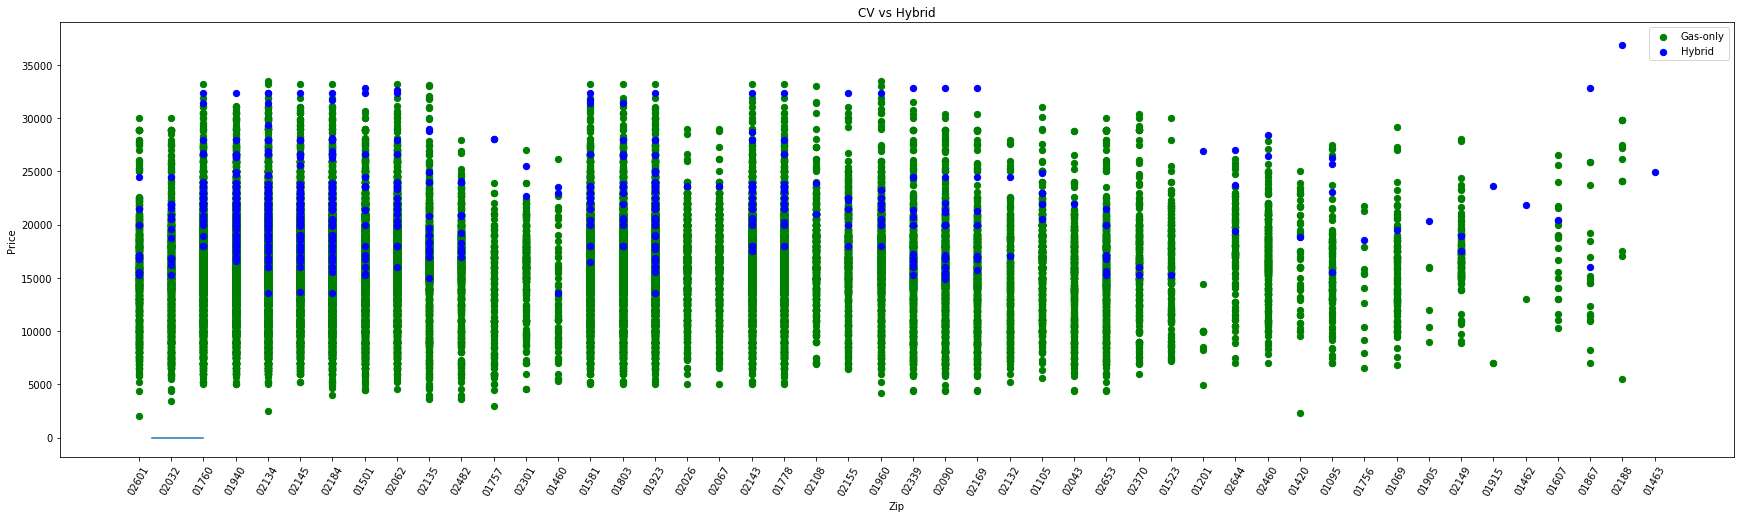

In [41]:
plt.figure(figsize=(30,8))
plt.scatter(df_cv['zip'], df_cv['price'], c='g', s=40)
plt.scatter(df_hybrid['zip'], df_hybrid['price'], c='b', s=40)
plt.xlabel('Zip')
plt.xticks(rotation=60)
plt.ylabel('Price')
plt.title('CV vs Hybrid')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('CV vs Hybrid Scatter',dpi=300)
plt.show()

In [42]:
lst_hybrid_color = ['BlackBlack', 'BlackSilver', 'WhiteBlack', 'BlackBlue', 'GraySilver', \
                    'BlackGray', 'BeigeWhite', 'BlackGold', 'WhiteGray', 'GrayGray',\
                    'blackblack', 'BlackGreen', 'BlackBrown', 'BlackWhite', 'BrownBlack', \
                    'WhiteRed','WhiteWhite']
print(lst_hybrid_color)
df_cv = df_cv.loc[list(df_cv[df_cv['in_out_color'].isin(lst_hybrid_color)].index)]
len(df_cv)

['BlackBlack', 'BlackSilver', 'WhiteBlack', 'BlackBlue', 'GraySilver', 'BlackGray', 'BeigeWhite', 'BlackGold', 'WhiteGray', 'GrayGray', 'blackblack', 'BlackGreen', 'BlackBrown', 'BlackWhite', 'BrownBlack', 'WhiteRed', 'WhiteWhite']


20231

In [43]:
print(len(df_hybrid))

512


In [44]:
df_cv_hybrid = pd.concat([df_hybrid,df_cv])
df_cv_hybrid.describe()
#df_cv_hybrid.to_csv('Final_data_MA.csv')

,miles,price,year,engine_size,doors,cylinders,scraped_at,status_date,dealer_id,latitude,longitude,dom
count,20743.000000,20743.000000,20743.000000,20743.000000,20743.000000,20743.000000,2.074300e+04,2.074300e+04,2.074300e+04,20743.000000,20743.000000,20743.000000
mean,41420.308104,16977.622785,2014.911633,2.483710,3.854794,4.225618,1.542338e+09,1.543666e+09,1.026880e+06,42.340906,-71.163157,62.702927
std,25494.194699,4089.353465,2.175204,0.392198,0.518979,0.632734,1.434019e+07,1.436113e+07,3.072905e+04,0.150632,0.274501,66.152622
min,1.000000,4375.000000,2001.000000,1.500000,2.000000,4.000000,1.453678e+09,1.453771e+09,1.374400e+04,41.650000,-73.257900,1.000000
25%,24146.000000,14888.000000,2014.000000,2.400000,4.000000,4.000000,1.532619e+09,1.534360e+09,1.002140e+06,42.230000,-71.204300,24.000000
50%,35947.000000,16968.000000,2015.000000,2.400000,4.000000,4.000000,1.542192e+09,1.543436e+09,1.017921e+06,42.350589,-71.100000,45.000000
75%,52201.500000,18998.000000,2016.000000,2.400000,4.000000,4.000000,1.552965e+09,1.554167e+09,1.036580e+06,42.420000,-71.010373,80.000000
max,188619.000000,36870.000000,2019.000000,3.500000,4.000000,6.000000,1.568162e+09,1.568175e+09,1.102338e+06,42.670000,-70.000000,1303.000000


In [45]:
'''3.0 EX',
 '3.0 SE',
 'Base',
 'EX',
 'EX LEATHER',
 'EX Leather',
 'EX V6',
 'EX W/LEATHER',
 'EX-L',
 'EX-L V-6',
 'EX-L V6',
 'Hybrid',
 'Hybrid EX',
 'Hybrid EX-L',
 'Hybrid Touring',
 'LX',
 'LX-P',
 'LX-S',
 'LX-SE',
 'Plug-In',
 'SE',
 'Sport',
 'Sport SE',
 'Touring',
 'Touring V6',
 'VP'''

"3.0 EX',\n '3.0 SE',\n 'Base',\n 'EX',\n 'EX LEATHER',\n 'EX Leather',\n 'EX V6',\n 'EX W/LEATHER',\n 'EX-L',\n 'EX-L V-6',\n 'EX-L V6',\n 'Hybrid',\n 'Hybrid EX',\n 'Hybrid EX-L',\n 'Hybrid Touring',\n 'LX',\n 'LX-P',\n 'LX-S',\n 'LX-SE',\n 'Plug-In',\n 'SE',\n 'Sport',\n 'Sport SE',\n 'Touring',\n 'Touring V6',\n 'VP"

In [46]:
#list_EX = ['EX','EX LEATHER','EX Leather','EX V6','EX W/LEATHER']
list_EXL = ['EX-L','EX-L V-6','EX-L V6']
list_Touring = ['Touring','Touring V6']
def select_df(df, lst):
    index = list(df[df['trim'].isin(lst)].index)
    return df.loc[index]
#df_cv_EX = select_df(df_cv_hybrid, list_EX)
df_cv_EXL = select_df(df_cv_hybrid, list_EXL)
df_cv_Touring = select_df(df_cv_hybrid,list_Touring)
#df_hybrid_EX = df_cv_hybrid.loc[df_cv_hybrid['trim'] == 'Hybrid EX']
df_hybrid_EXL = df_cv_hybrid.loc[df_cv_hybrid['trim'] == 'Hybrid EX-L']
df_hybrid_Touring = df_cv_hybrid.loc[df_cv_hybrid['trim'] == 'Hybrid Touring']

In [47]:
df_cv_EXL.shape

(3516, 16)

In [48]:
df_hybrid_EXL.shape

(297, 16)

In [49]:
df_hybrid_Touring.shape

(119, 16)

In [50]:
len(df_cv_hybrid.loc[df_cv_hybrid['trim'] == 'Hybrid'])

93

In [51]:
print(len(df_cv_EXL) + len(df_cv_Touring))

4228


In [52]:
print(len(df_hybrid_EXL) + len(df_hybrid_Touring))

416


In [53]:
#set(df_cv_hybrid['base_interior_color'])

In [54]:
#set(df_cv_hybrid['base_exterior_color'])

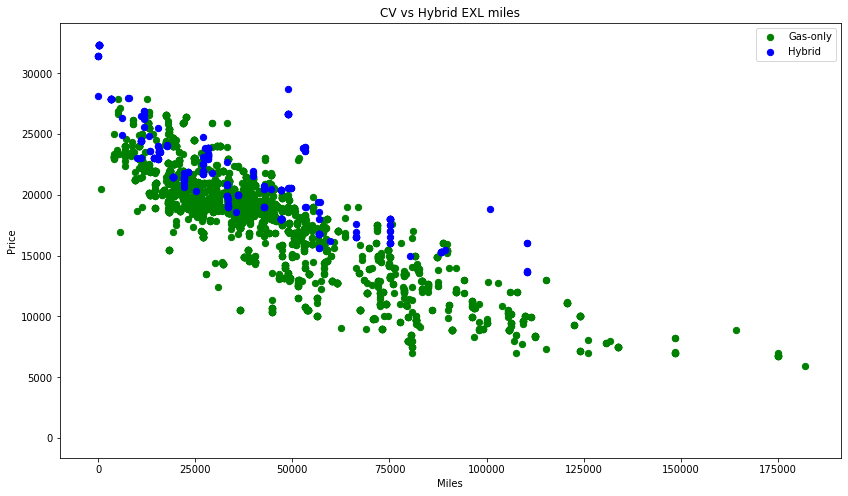

In [56]:
plt.figure(figsize=(14,8))
plt.scatter(df_cv_EXL['miles'], df_cv_EXL['price'], c='g', s=40)
plt.scatter(df_hybrid_EXL['miles'], df_hybrid_EXL['price'], c='b', s=40)
plt.xlabel('Miles')
plt.ylabel('Price')
plt.title('CV vs Hybrid EXL miles')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('CV vs Hybrid EXL miles')
plt.show()

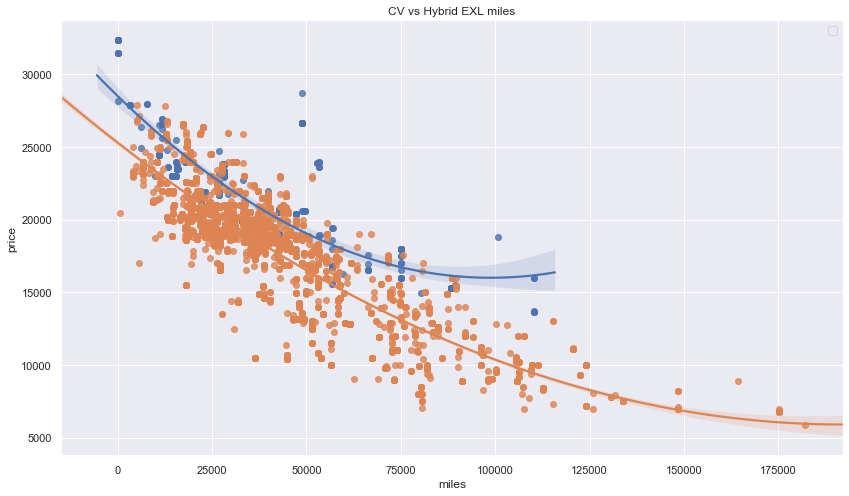

In [64]:
plt.figure(figsize=(14,8))
plt.title('CV vs Hybrid EXL miles')
plt.legend(labels = ['CV','Hybrid'],loc = 'best')
sns.regplot(x='miles', y='price', data=df_hybrid_EXL, order=2)
sns.regplot(x='miles', y='price', data=df_cv_EXL, order=2, )
plt.show()